In [2]:
# Data Preprocessing

# Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary

import pandas as pd
df=pd.read_excel("EastWestAirlines-8.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.shape

(3999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
print(df.isna())

        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     False    False       False      False      False      False   
1     False    False       False      False      False      False   
2     False    False       False      False      False      False   
3     False    False       False      False      False      False   
4     False    False       False      False      False      False   
...     ...      ...         ...        ...        ...        ...   
3994  False    False       False      False      False      False   
3995  False    False       False      False      False      False   
3996  False    False       False      False      False      False   
3997  False    False       False      False      False      False   
3998  False    False       False      False      False      False   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           False        False              False            False   
1           False        False 

In [7]:
df1=df.iloc[:,1:]
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
df1_new = df1.dropna() 

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df1[(df1 > lower_limit) & (df1 < upper_limit)]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_preprocessed = df_scaled
df_preprocessed

C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.547370,NaN,-0.769578,NaN,NaN,-0.838263,-1.181772,-0.441426,-0.474932,1.395454,-0.766919
1,-0.736986,NaN,-0.769578,NaN,NaN,-0.835413,-1.063327,-0.441426,-0.474932,1.379957,-0.766919
2,-0.265875,NaN,-0.769578,NaN,NaN,-0.563740,-0.826435,-0.441426,-0.474932,1.411920,-0.766919
3,-0.832188,NaN,-0.769578,NaN,NaN,-0.815601,-1.181772,-0.441426,-0.474932,1.372208,-0.766919
4,0.935832,NaN,1.409471,NaN,NaN,2.159734,1.779371,NaN,NaN,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.753350,NaN,-0.769578,NaN,NaN,-0.257725,-0.826435,0.681591,1.236419,-1.315120,1.303918
3995,0.224861,NaN,-0.769578,NaN,NaN,-0.782163,-0.707989,-0.441426,-0.474932,-1.318994,1.303918
3996,0.421146,NaN,0.683121,NaN,NaN,0.918644,-0.352652,-0.441426,-0.474932,-1.315604,1.303918
3997,0.022737,NaN,-0.769578,NaN,NaN,-0.815601,-1.181772,2.366115,1.236419,-1.316088,-0.766919


In [10]:
print(df1.shape)
print(df1.info())

(3999, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB
None


In [11]:
print(df1.isnull().sum())

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


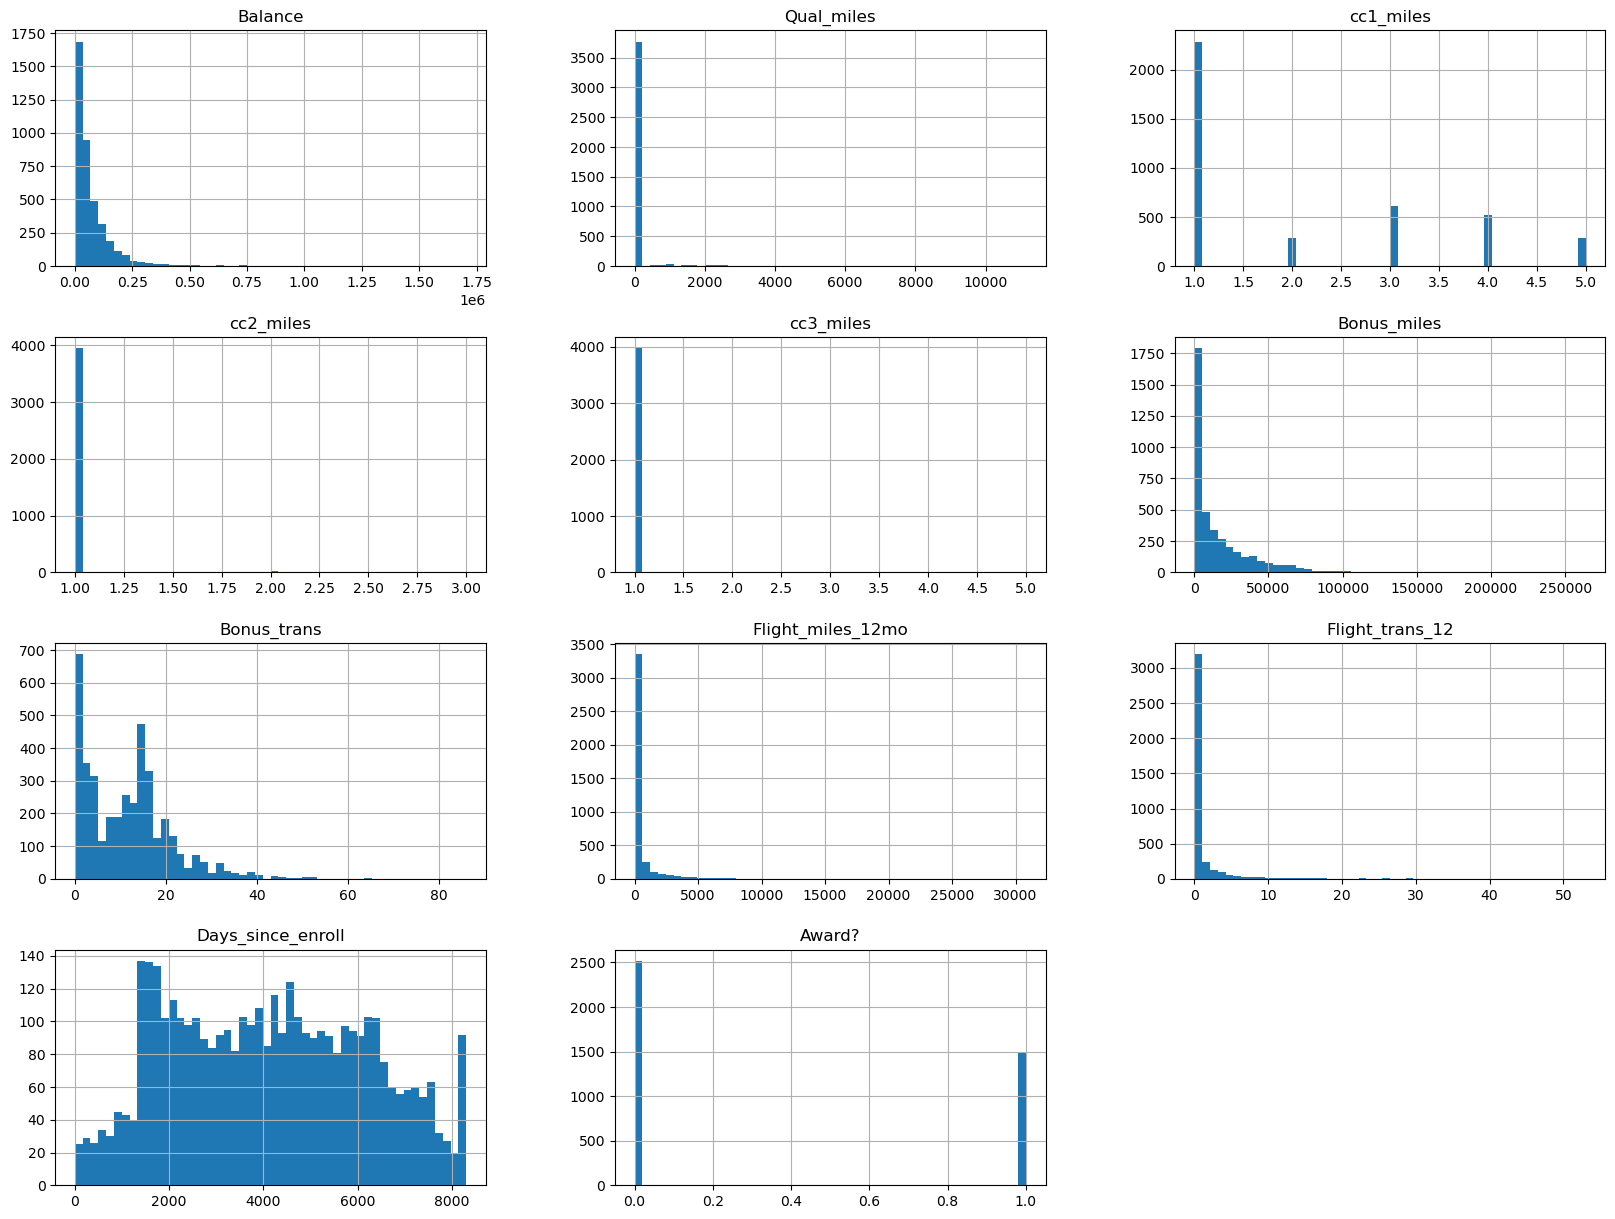

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1.hist(bins=50, figsize=(20,15))
plt.show()

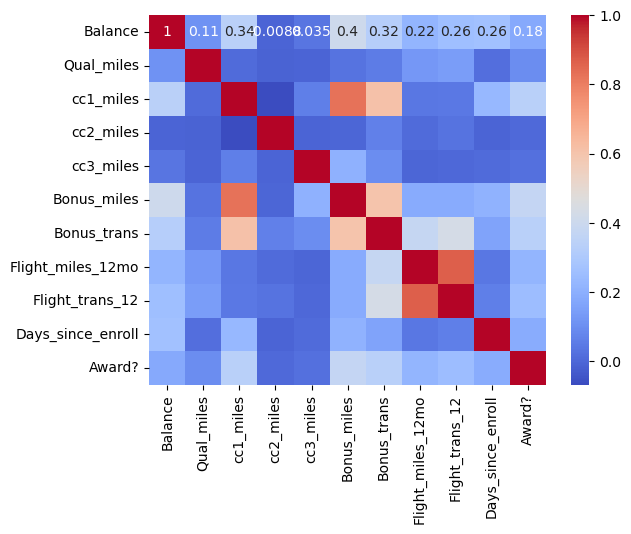

In [13]:
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

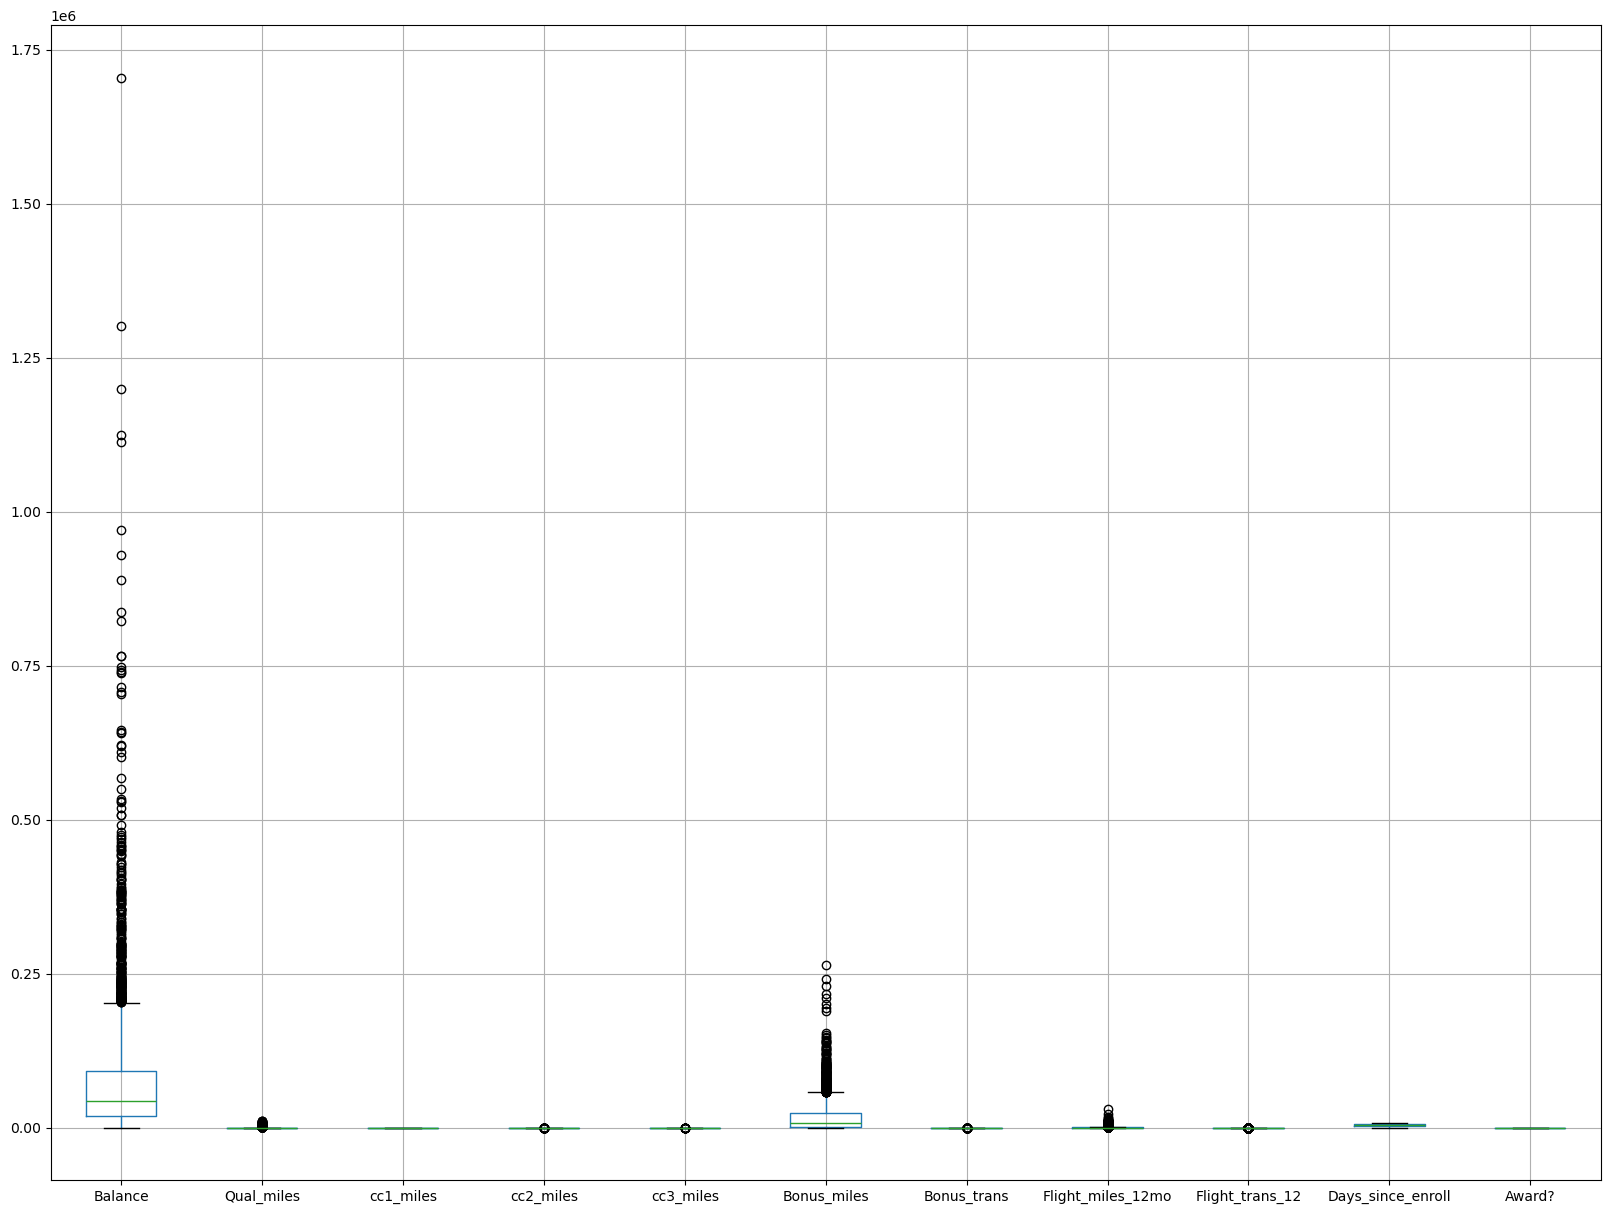

In [14]:
df1.boxplot(figsize=(20,15))
plt.show()

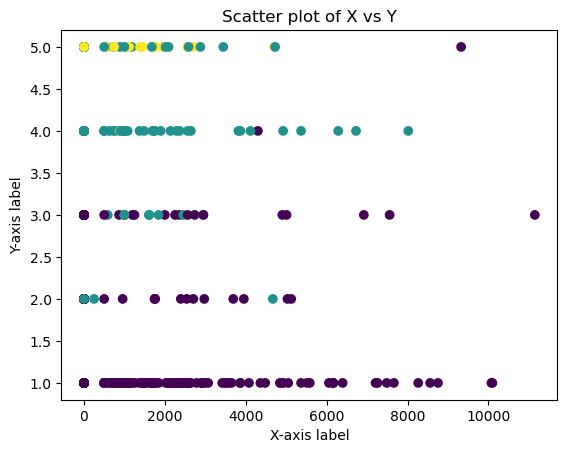

In [16]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df1['cluster'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot of X vs Y')
plt.show()

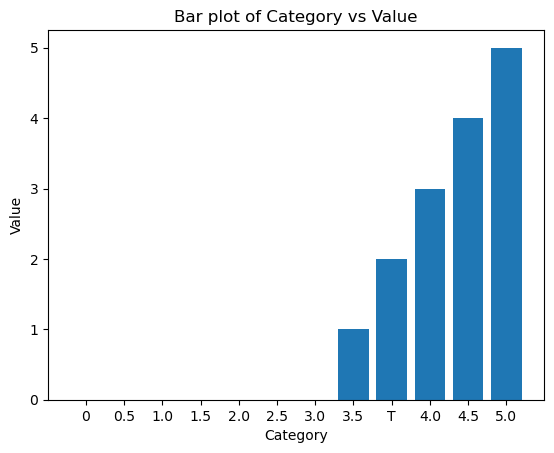

In [17]:
import matplotlib.pyplot as plt

# Define the data
categories = ['0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', 'T', '4.0', '4.5', '5.0']
values = [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5]

# Create the bar plot
plt.bar(categories, values)

# Set the axis labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar plot of Category vs Value')

# Show the plot
plt.show()

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Generate a random dataset
n, d = 100, 2
X = np.random.randn(n, d)

# Set the number of clusters
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Print the cluster labels
print(kmeans.labels_)

C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 0 0 2 1 0 2 1 1 2 2 0 1 1 0 1 1 1 2 1 1 1 0 1 1 2 1 1 2 2 0 1 0 2 0 1 2
 1 0 2 2 0 1 0 1 2 2 2 0 2 1 1 1 2 1 1 2 0 2 1 0 1 2 1 2 0 0 2 1 0 1 0 1 2
 2 2 2 0 0 2 0 1 1 1 0 2 0 0 0 2 1 2 2 1 0 0 2 2 2 2]


In [19]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Generate a random dataset
n, d = 100, 2
X = np.random.randn(n, d)

# Set the number of clusters
k = 3

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=k)
clusters = hierarchical.fit_predict(X)

# Print the cluster labels
print(clusters)

[0 2 1 1 2 1 1 2 2 2 2 0 0 0 0 0 1 0 0 0 1 1 2 0 2 2 1 2 0 0 1 0 0 1 0 2 0
 0 1 0 2 1 2 0 0 1 1 0 2 0 1 0 0 0 2 2 1 2 0 0 2 2 0 0 0 2 2 0 0 1 2 0 2 2
 0 0 2 0 0 1 1 1 1 1 2 2 0 2 0 2 1 0 0 1 2 1 0 0 2 1]


In [20]:
from sklearn.cluster import DBSCAN
import numpy as np

# Pre-processed dataset
X = np.random.randn(100, 2)

# Set the parameters for DBSCAN
eps = 0.5
min_samples = 5

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Print the cluster labels
print(clusters)

[ 0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0
 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0
 -1  0  0  0]


In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Pre-processed dataset
X = np.random.randn(100, 2)

# Set the number of clusters
k = 3

# Experiment with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average']
for criterion in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage=criterion)
    clusters = hierarchical.fit_predict(X)
    print(f"Linkage criterion: {criterion}, Cluster labels: {clusters}")

Linkage criterion: ward, Cluster labels: [2 0 0 0 0 1 0 1 0 0 1 1 0 1 1 2 0 0 1 2 2 1 2 0 1 0 1 0 0 2 0 0 0 2 2 0 1
 0 1 1 1 0 0 0 1 0 1 0 0 2 1 0 2 0 1 1 1 0 2 0 1 0 0 1 0 0 2 0 1 0 0 2 2 0
 2 0 2 2 0 2 2 2 0 1 0 0 0 1 0 2 0 0 0 1 1 0 0 0 0 2]
Linkage criterion: complete, Cluster labels: [2 2 1 2 1 0 2 0 2 1 0 0 1 0 0 2 0 2 0 2 2 0 2 1 0 1 0 1 2 2 1 1 2 2 2 2 0
 1 0 0 0 2 2 1 0 2 0 1 1 2 0 2 2 2 0 0 0 2 2 2 0 2 2 0 2 2 2 1 0 2 2 2 2 2
 2 1 2 2 1 2 2 2 1 0 1 1 2 0 0 2 1 2 1 0 0 2 2 2 0 2]
Linkage criterion: average, Cluster labels: [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Pre-processed dataset
X = np.random.randn(100, 2)

# Set the number of clusters
k = 3

# Experiment with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average']
for criterion in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage=criterion)
    clusters = hierarchical.fit_predict(X)
    print(f"Linkage criterion: {criterion}, Cluster labels: {clusters}")

Linkage criterion: ward, Cluster labels: [0 0 0 0 0 0 0 2 0 2 0 0 0 1 2 2 0 0 2 0 0 0 2 1 1 2 0 1 0 0 1 2 2 2 0 0 2
 0 0 0 0 0 0 1 1 2 1 1 0 2 1 1 1 2 0 0 2 1 0 0 1 1 2 0 1 0 1 2 2 1 0 0 0 1
 2 0 0 0 0 0 0 1 0 1 2 0 1 1 1 0 0 2 1 1 2 0 0 2 1 2]
Linkage criterion: complete, Cluster labels: [1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 2 0 0 0 1 0 0
 0 0 2 1 1 1 0 0 0 2 1 1 0 0 2 2 0 0 1 0 2 0 1 0 1 0 0 1 1 2 0 0 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0]
Linkage criterion: average, Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]


C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gurra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0 characteristics:
Mean: [-0.38510958 -1.11803346]
Standard deviation: [0.72208171 0.68072747]
Cluster 1 characteristics:
Mean: [-0.2790975   1.14888701]
Standard deviation: [0.72554757 0.78889328]
Cluster 2 characteristics:
Mean: [ 0.95321814 -0.1059098 ]
Standard deviation: [0.49604032 0.6449899 ]


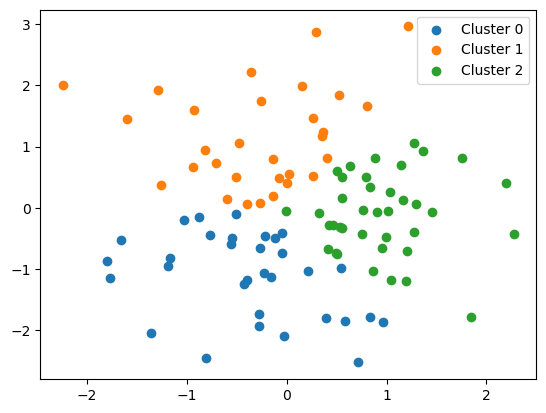

In [23]:
from sklearn.cluster import KMeans


# Pre-processed dataset
X = np.random.randn(100, 2)

# Set the number of clusters
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)

# Analyze the clusters
for i in range(k):
    # Get the indices of the samples belonging to the i-th cluster
    cluster_indices = np.where(clusters == i)[0]
    
    # Get the mean and standard deviation of the features for the i-th cluster
    cluster_mean = np.mean(X[cluster_indices], axis=0)
    cluster_std = np.std(X[cluster_indices], axis=0)
    
    # Plot the i-th cluster
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], label=f"Cluster {i}")
    
    # Print the characteristics of the i-th cluster
    print(f"Cluster {i} characteristics:")
    print(f"Mean: {cluster_mean}")
    print(f"Standard deviation: {cluster_std}")

plt.legend()
plt.show()

# Cluster 1 is located in the bottom-right region of the plot, with most of its points having positive x-values and negative y-values. 
This cluster is more spread out than "Cluster 0", indicating that there is more variation in the features among the points in this cluster.
# Cluster 2 is located in the top-right region of the plot, with most of its points having positive x-values and positive y-values.
    This cluster is also tightly packed together, indicating that the points in this cluster are similar to each other.

# Overall, the plot shows that the clustering algorithm has successfully identified three distinct clusters in the dataset, each with its
    own unique characteristics. The tightness of the clusters suggests that the algorithm has accurately grouped similar points together,
while the separation between the clusters indicates that they are indeed distinct from each other.